In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Data preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('auto1_prep.csv', sep=',')
df['car age']=(2021-df['year'])
df['cost level']=np.where (df['price']<=9.5,0,1)
df

,brand,year,price,car_mileage,fuel,power,transmission,car age,cost level
0,0,2006.0,8.584852,5.393628,0,2.0,2,15.0,0
1,1,2017.0,9.740969,5.351858,0,2.0,2,4.0,1
2,2,2015.0,9.629051,5.056246,0,2.0,2,6.0,1
3,0,2000.0,8.516993,5.703782,0,2.0,2,21.0,0
4,3,2010.0,9.937889,6.525030,0,3.0,1,11.0,1
...,...,...,...,...,...,...,...,...,...
212,0,2016.0,9.546741,5.135798,0,2.0,2,5.0,1
213,4,2010.0,9.332558,5.509388,0,2.0,2,11.0,0
214,3,2000.0,8.517193,5.521461,0,3.0,2,21.0,0
215,3,2001.0,8.922658,5.913503,0,2.0,1,20.0,0


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['brand', 'year', 'price', 'car_mileage', 'fuel', 'power', 'transmission', 'car age', 'cost level']).round()

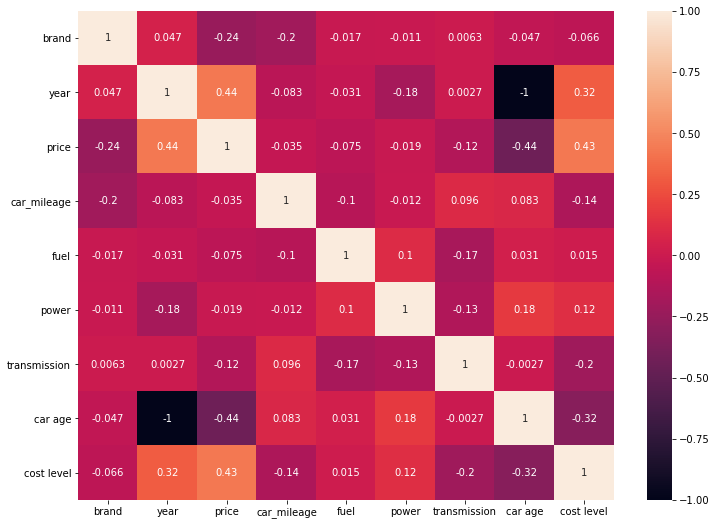

In [4]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

# Number of clusters

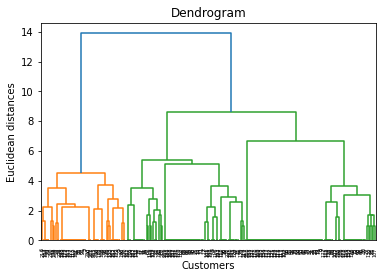

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Выделим 5 кластеров

# Baseline model

In [12]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [13]:
hc

array([2, 0, 0, 1, 0, 1, 1, 1, 3, 3, 0, 4, 0, 0, 0, 1, 0, 0, 3, 3, 1, 4,
       2, 2, 3, 3, 3, 1, 0, 1, 0, 3, 3, 3, 3, 4, 4, 0, 0, 1, 0, 0, 0, 1,
       3, 2, 2, 3, 2, 0, 3, 4, 4, 3, 3, 4, 1, 2, 3, 0, 4, 0, 1, 1, 0, 0,
       2, 4, 2, 0, 3, 4, 2, 4, 3, 2, 1, 2, 3, 1, 1, 2, 3, 2, 2, 3, 2, 4,
       2, 1, 1, 1, 0, 1, 3, 3, 0, 0, 1, 1, 1, 1, 3, 4, 3, 2, 1, 2, 0, 4,
       1, 0, 0, 3, 0, 1, 0, 3, 3, 4, 0, 3, 1, 3, 3, 3, 0, 1, 2, 0, 2, 3,
       3, 1, 3, 2, 2, 3, 0, 0, 1, 0, 0, 0, 4, 0, 4, 2, 2, 3, 2, 4, 1, 1,
       3, 2, 2, 3, 3, 4, 3, 0, 0, 1, 1, 1, 0, 4, 0, 3, 3, 3, 1, 1, 3, 2,
       1, 2, 2, 1, 0, 4, 4, 4, 1, 2, 0, 3, 3, 1, 1, 0, 4, 0, 0, 0, 1, 1,
       1, 0, 3, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 3, 0, 3, 1, 1, 2],
      dtype=int64)

# Feature Reduction

In [14]:
X = df.iloc[:, [1, 2, 8]]

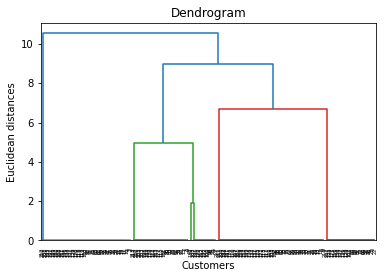

In [15]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(X)

In [20]:
import pickle
obj = {'hc': hc}
output = open('clust.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()